In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
candidate_info = pd.read_csv('Candidates_2018.txt', sep='\t')
raw = pd.read_csv('echo_computation3.csv', low_memory=False)

In [3]:
raw['ratio'] = raw.f_of_f_candidate_followers/raw.n_f_of_f
raw['ratio_normalized'] = raw.ratio/raw.n_candidate_followers
#divide by number of followers in state (state population)
#divide by number of followers + opponent followers 
#divide by log(number of candidate followers)

#raw['ratio_normalized'] = raw.ratio/ state followers


raw['only_candidate'] = raw.f_of_f_candidate_followers - raw.candidate_and_opponent_followers
raw['only_opponent'] = raw.opponent_followers - raw.candidate_and_opponent_followers

raw['ratio_only_candidate'] = raw.only_candidate / raw.n_f_of_f
raw['ratio_only_candidate_normalized'] = raw.ratio_only_candidate / raw.n_candidate_followers

raw['ratio_only_opponent'] = raw.only_opponent / raw.n_f_of_f
raw['ratio_only_opponent_normalized'] = raw.ratio_only_opponent / raw.n_candidate_followers

raw['ratio_candidate_and_opponent'] = raw.candidate_and_opponent_followers / raw.n_f_of_f
raw['ratio_candidate_and_opponent_normalized'] = raw.ratio_candidate_and_opponent / raw.n_candidate_followers

raw['ratio_opponent_over_candidate_followers'] = raw.opponent_followers / raw.n_f_of_f

In [ ]:
#Candidate: Oded
#Candidate Followers: Verena and David

#echo chamber =  

In [4]:
raw.only_candidate.describe()

count    275972.000000
mean         93.919738
std         335.056405
min           0.000000
25%           5.000000
50%          21.000000
75%          69.000000
max       65607.000000
Name: only_candidate, dtype: float64

In [5]:
raw.only_opponent.describe()

count    275972.000000
mean         16.642482
std         234.748860
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max       95029.000000
Name: only_opponent, dtype: float64

# For which candidates do we not know who their followers are?

In [5]:
import twitter
api = twitter.Api(consumer_key= 'RoKyGypNXjkKxAMZ56ZmACAXU',
                  consumer_secret='zjEqTC8byFOjuMUPwoiRbBa6iBACglP8Jy4Z9lbTdbX7fbjNFk',
                  access_token_key= '825138308426653697-DYieQ0F5GEVzXdwldCiIacmTrK2A8ru',
                  access_token_secret= 'mSoV9doa4zaFG6ffOHk5Btw8d30xeW9AIZSXYlyMMAtKq')

In [6]:
errors = raw[raw['ratio_normalized'] == 'error'].candidates.unique()

/Users/davidreissmello/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [7]:
for error in errors:
    try:
        print(api.GetUser(error))
    except:
        print(error)

In [8]:
raw = raw[raw['ratio_normalized'] != 'error']

In [9]:
raw.ratio = pd.to_numeric(raw.ratio)
raw.ratio_normalized = pd.to_numeric(raw.ratio_normalized)

In [10]:
raw.head()

,candidates,followers,f_of_f_candidate_followers,n_f_of_f,ratio,n_candidate_followers,ratio_normalized,opponent_followers,candidate_and_opponent_followers,only_candidate,only_opponent,ratio_only_candidate,ratio_only_candidate_normalized,ratio_candidate_and_opponent,ratio_opponent_over_candidate_followers
0,1477484929,26292603,0,20606,0.0,2,0.0,0,0,0,0,0.0,0.0,0.0,0.0
1,1477484929,1252381038,0,423,0.0,2,0.0,0,0,0,0,0.0,0.0,0.0,0.0
2,969648670818811904,937362574814748672,0,446,0.0,12,0.0,0,0,0,0,0.0,0.0,0.0,0.0
3,969648670818811904,4896017459,0,4864,0.0,12,0.0,0,0,0,0,0.0,0.0,0.0,0.0
4,969648670818811904,1049645884743606272,0,456,0.0,12,0.0,0,0,0,0,0.0,0.0,0.0,0.0


In [11]:
raw.shape

(275972, 15)

In [12]:
len(raw.candidates.unique())

95

# Are all the candidates in the echo_computation in the candidate_info?

In [13]:
missing = list(set(raw.candidates) - set(candidate_info.UserID))
missing

[974753842561601536,
 985904307017924608,
 1004724076810833920,
 722092071285207040,
 847171099376914432,
 956324325556146176,
 912402069335805952,
 949089035556982784,
 902612614634725376,
 885364339321954304,
 861246117689925632,
 958408514807967744]

In [14]:
#who are these candidates?
import twitter
api = twitter.Api(consumer_key= 'RoKyGypNXjkKxAMZ56ZmACAXU',
                  consumer_secret='zjEqTC8byFOjuMUPwoiRbBa6iBACglP8Jy4Z9lbTdbX7fbjNFk',
                  access_token_key= '825138308426653697-DYieQ0F5GEVzXdwldCiIacmTrK2A8ru',
                  access_token_secret= 'mSoV9doa4zaFG6ffOHk5Btw8d30xeW9AIZSXYlyMMAtKq')

for missed in missing:
    try:
        user = api.GetUser(missed)
        print(user.name)
    except:
        print('User not found')

User not found
User not found
User not found
User not found
User not found
User not found
User not found
User not found
User not found
User not found
User not found
User not found


In [15]:
#if user is real:
api.GetUser(216776631)

User(ID=216776631, ScreenName=BernieSanders)

# Which candidates are in the candidate_info but not in the echo computation?

In [16]:
missing2 = list(set(candidate_info.UserID) - set(raw.candidates))
missing2

[747234420676038656,
 1163888566079873025,
 722092071285207042,
 912402069335805954,
 956324325556146177,
 861246117689925633,
 949089035556982786,
 985904307017924614,
 958408514807967751,
 1004724076810833921,
 847171099376914433,
 974753842561601537,
 902612614634725377,
 885364339321954305]

In [17]:
candidate_info[candidate_info['UserID'].isin(missing2)]['Real Name']

7                      Robert Arlett
9                Kerri Evelyn Harris
13                      Lucy Brenton
18                   Zak Ringelstein
27                        John James
31                     Jim Newberger
43                         Tim Hagan
45    Barry Michaels For U.S. Senate
47        Tricia Flanagan For Senate
48           Hoffman for Senate 2019
49                         Bob Hugin
52                    Natalie Rivera
64      Bob Flanders for U.S. Senate
72                       Tim Aalders
Name: Real Name, dtype: object

# How many followers have 0 of their followers following the candidate?

In [6]:
df = pd.merge(raw, candidate_info, left_on='candidates', right_on='UserID')

In [7]:
print('Percentage of People Who Follow Candidate A where none of their followers follow Candidate A:')
print(sum(df.f_of_f_candidate_followers == 0) / df.shape[0])

Percentage of People Who Follow Candidate A where none of their followers follow Candidate A:
0.029340347219697062


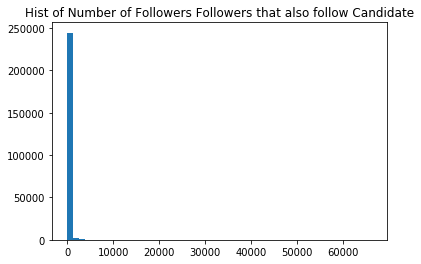

In [8]:
plt.hist(df.f_of_f_candidate_followers, bins=50)
plt.title('Hist of Number of Followers Followers that also follow Candidate')
plt.show()

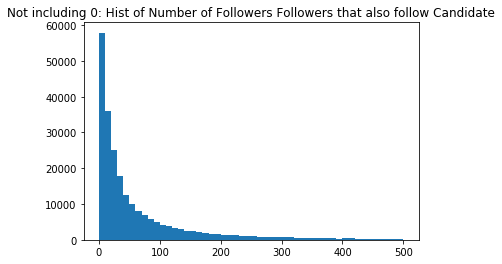

In [9]:
non_zero = df.f_of_f_candidate_followers[df.f_of_f_candidate_followers != 0]
plt.hist(non_zero, bins=50, range=(0,500))
plt.title('Not including 0: Hist of Number of Followers Followers that also follow Candidate')
plt.show()

# Followers with largest number of their followers following candidate:

In [10]:
most_followers_following_candidate = df.nlargest(20, 'f_of_f_candidate_followers')
most_followers_following_candidate.head()

,candidates,followers,f_of_f_candidate_followers,n_f_of_f,ratio,n_candidate_followers,ratio_normalized,opponent_followers,candidate_and_opponent_followers,only_candidate,...,Profile Created At,URL,Location,UTC Offset,Time Zone,Favourites Count,Friends Count,Followers Count,Statuses Count,Profile Image URL
219764,172858784,33923443,66247,4501892,0.014715,987620,1.489983e-08,4051,640,65607,...,Fri Jul 30 20:00:32 +0000 2010,https://t.co/YNK0Xrmt2G,"Richmond, VA",None,None,836,774,987493,10065,http://pbs.twimg.com/profile_images/9224721183...
242421,970207298,16383523,37618,296251,0.126980,5304955,2.393614e-08,0,0,37618,...,Sun Nov 25 15:14:27 +0000 2012,http://t.co/wsbNrrUt,,None,None,10,493,5305029,4605,http://pbs.twimg.com/profile_images/7220441747...
218405,172858784,580312540,19398,49601,0.391081,987620,3.959831e-07,100,64,19334,...,Fri Jul 30 20:00:32 +0000 2010,https://t.co/YNK0Xrmt2G,"Richmond, VA",None,None,836,774,987493,10065,http://pbs.twimg.com/profile_images/9224721183...
222668,1074480192,17171142,18372,54728,0.335697,1284975,2.612475e-07,3091,1395,16977,...,Wed Jan 09 18:11:37 +0000 2013,https://t.co/9HWCyvsTvJ,"Houston, Texas",None,None,408,6955,1284626,11042,http://pbs.twimg.com/profile_images/1100507943...
222945,1074480192,2625544698,17374,42561,0.408214,1284975,3.176825e-07,782,547,16827,...,Wed Jan 09 18:11:37 +0000 2013,https://t.co/9HWCyvsTvJ,"Houston, Texas",None,None,408,6955,1284626,11042,http://pbs.twimg.com/profile_images/1100507943...


In [46]:
n_following = most_followers_following_candidate.f_of_f_candidate_followers.tolist()
echo_chamber = most_followers_following_candidate.ratio_normalized.tolist()
candidate_names = most_followers_following_candidate['Real Name'].tolist()

for i, follower in enumerate(most_followers_following_candidate.followers):
    user = api.GetUser(follower)
    print(user.name, n_following[i], echo_chamber[i], candidate_names[i])

MarQuis Trill Support The Movement with Engagement 66247 1.4899828436641927e-08 Tim Kaine
Algernon  Fross 37618 2.393614311380207e-08 Elizabeth Warren
Amee Vanderpool 19398 3.959830957082352e-07 Tim Kaine
Craig Huey 18372 2.6124752278776737e-07 Senator Ted Cruz
♥️👠SassyTrumpChic{⭐️} 17374 3.1768251733612485e-07 Senator Ted Cruz
Deplorable Floridian❌ 16674 3.448896433189533e-07 Senator Ted Cruz
ᎠᏌNᎬᎷYᎢᎻᎪNᏩ™️ 14961 3.2935186241389677e-07 Tim Kaine
Jodi * HR-1 & HR-8 14465 3.405041733569981e-07 Sen Dianne Feinstein
Pat Fuller is a Democrat #Antiracist #GutsyWoman 14157 6.034597273288557e-07 Sheldon Whitehouse
♥️♥️ Neena ♥️♥️ 🚂🚃🌬 13659 3.733545990471221e-07 Senator Ted Cruz
R. Donohue🆘 #Resist #Impeach | arm chair activist 13597 7.038987801683872e-07 Senator Mazie Hirono
Vince (pull no punches) Pesce 12964 3.076145744319126e-07 Sen Dianne Feinstein
Tipping Point🇺🇸 12430 3.0948745675224026e-07 Senator Ted Cruz
Michael Hansen #KAGCaravan 11710 3.308891384841327e-07 Senator Ted Cruz
Sensei Ry

# Followers who most followers only follow opponent:

In [88]:
most_followers_also_following_opponent = df.nlargest(20, 'only_opponent')

n_following = most_followers_also_following_opponent.only_opponent.tolist()
echo_chamber = most_followers_also_following_opponent.ratio_opponent_over_candidate_followers.tolist()
candidate_names = most_followers_also_following_opponent['Real Name'].tolist()

for i, follower in enumerate(most_followers_also_following_opponent.followers):
    user = api.GetUser(follower)
    print(user.name, n_following[i], echo_chamber[i], candidate_names[i])

30,000 ARMY SUICIDES 95029 0.11204700425130563 Jenny Wilson
@HarjinderKukreja on Instagram 29779 0.019428176635049362 Corey Stewart
Red T Raccoon 19669 0.41247488911430674 Kevin de Leόn
Lord Louis 16259 0.023544012846482436 Senator Ted Cruz
KrisS 🔥 Your Vote, Your Voice 🔥 15730 0.42975941422594144 Kevin de Leόn
Ron *Thug* Hall 14183 0.33970167778541194 Kevin de Leόn
Etienne Arsenault 14033 0.009860392804994626 Matthew Corey
Scott Isbell 13101 0.04010732307989473 Jenny Wilson
Lil B THE BASEDGOD 11876 0.008645959961223014 Kevin de Leόn
The Spector Report 10350 0.29253410846623196 Kevin de Leόn
Charlie Kirk 10342 0.045571677600276216 Corey Stewart
Dr. Eric Grabowsky 9407 0.0404852481190295 Jenny Wilson
Lord Louis 9252 0.01342767031559945 Kevin de Leόn
Furniture Assembly Experts - DC MD VA Baltimore 9070 0.0592097461726176 Corey Stewart
Charlie Kirk 8991 0.03812727900494328 Matthew Corey
Wes Jordan✌💙 8085 0.08125913806307875 Jenny Wilson
Scott Dworkin 7623 0.10487832598785155 Jenny Wilson


# Most echo-chambered Followers: 

In [48]:
most_echod_followers = df.nlargest(20, 'ratio_normalized')

In [26]:
echo_chamber = most_echod_followers.ratio_normalized.tolist()
candidate_names = most_echod_followers['Real Name'].tolist()
for i, follower in enumerate(most_echod_followers.followers):
    user = api.GetUser(follower)
    print(user.name, echo_chamber[i], candidate_names[i])

An Independent Voice 0.0016775396085740913 Kevin Kimple
Not Chris McDaniel 0.0014296606938619901 Shawn O'Hara
Childers' Moustache 0.0011796427367711494 Shawn O'Hara
Chuckies Beard 0.001143728555089592 Shawn O'Hara
Turned Off Lamp of Liberty 0.0009302325581395349 Shawn O'Hara
Larry Girouard 0.0009174311926605505 Bob Flanders
Monique Chartier 0.0008792048929663609 Bob Flanders
Ken Budris 0.0007477833564790087 Kevin Kimple
John Carlevale 0.000704563170834083 Bob Flanders
J.H. Snider 0.0007008154943934761 Bob Flanders
John Hill 0.0006831934413429631 Bob Flanders
Make MS Blue 0.0006803562592775854 Shawn O'Hara
Maureen Moakley 0.0006689602446483181 Bob Flanders
ann flanders 0.000655307994757536 Bob Flanders
Bill Felkner 0.0006414243508008086 Bob Flanders
Robert G. Flanders 0.0006116207951070336 Bob Flanders
Roger Clemente For Hawaii State Senate 0.0005818463925523662 Ron Curtis
Larry Berman 0.000576827995385376 Bob Flanders
Chuck Barton 0.0005733944954128441 Bob Flanders
RenewRI 0.0005610190

# Most/Least Echo Chambered Candidates 

In [11]:
candidate_echo = raw.groupby('candidates').mean()

In [21]:
candidate_echo.n_candidate_followers.describe()

count    8.300000e+01
mean     3.556624e+05
std      1.237608e+06
min      2.000000e+00
25%      3.079000e+03
50%      2.204000e+04
75%      1.153390e+05
max      9.631743e+06
Name: n_candidate_followers, dtype: float64

In [22]:
candidate_echo.sort_values('n_candidate_followers')

,followers,f_of_f_candidate_followers,n_f_of_f,ratio,n_candidate_followers,ratio_normalized,opponent_followers,candidate_and_opponent_followers,only_candidate,only_opponent,...,Profile Created At,URL,Location,UTC Offset,Time Zone,Favourites Count,Friends Count,Followers Count,Statuses Count,Profile Image URL
32,6.393368e+08,0.000000,10514.500000,0.000000,2.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,Sun Jun 02 14:42:30 +0000 2013,None,,None,None,0,0,2,0,http://abs.twimg.com/sticky/default_profile_im...
74,5.127620e+17,0.400000,16224.600000,0.000061,12.0,5.053312e-06,0.000000,0.000000,0.400000,0.000000,...,Fri Mar 02 19:00:33 +0000 2018,None,,None,None,2,41,12,13,http://pbs.twimg.com/profile_images/9722347569...
54,3.327443e+17,0.000000,6497.823529,0.000000,24.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,Sun Jan 11 00:44:11 +0000 2015,https://t.co/8qjPiv2NPG,"Seagirt, NJ",None,None,2,17,24,96,http://pbs.twimg.com/profile_images/7239159756...
51,5.072906e+17,3.407407,1740.925926,0.005505,37.0,1.487851e-04,0.000000,0.000000,3.407407,0.000000,...,Fri Jun 09 17:00:10 +0000 2017,None,New Jersey,None,None,91,56,37,211,http://pbs.twimg.com/profile_images/9584283490...
35,2.069926e+16,11.555556,61361.765432,0.014571,86.0,1.694312e-04,0.000000,0.000000,11.555556,0.000000,...,Wed Jun 11 02:53:45 +0000 2014,None,H'burg whudup,None,None,2,560,86,134,http://pbs.twimg.com/profile_images/4765601471...
34,2.639202e+17,11.738095,4094.565476,0.012997,206.0,6.309258e-05,0.000000,0.000000,11.738095,0.000000,...,Sat Aug 06 17:19:42 +0000 2016,https://t.co/tULcJOQDWF,,None,None,2855,200,206,1331,http://pbs.twimg.com/profile_images/1004765350...
28,1.963508e+17,37.492537,5265.489552,0.016774,404.0,4.152087e-05,0.000000,0.000000,37.492537,0.000000,...,Wed Oct 01 16:43:07 +0000 2014,https://t.co/MGWQ6FKhNJ,"St Clair Shores, MI",None,None,831,58,405,484,http://pbs.twimg.com/profile_images/7663767444...
65,1.025802e+17,39.810026,5241.601583,0.063831,436.0,1.464016e-04,299.073879,28.081794,11.728232,270.992084,...,Tue Aug 26 14:27:37 +0000 2014,https://t.co/VgOSJF9YUu,"Providence, RI",None,None,18,385,437,78,http://pbs.twimg.com/profile_images/9548651169...
0,2.983732e+17,11.769417,15142.101942,0.011844,517.0,2.290967e-05,0.000000,0.000000,11.769417,0.000000,...,Mon Aug 21 18:20:53 +0000 2017,https://t.co/LUSeUll12Z,"Phoenix, AZ",None,None,139,153,517,255,http://pbs.twimg.com/profile_images/9526583387...
57,3.175242e+17,23.600316,8010.620853,0.018951,816.0,2.322407e-05,111.232227,6.925750,16.674566,104.306477,...,Tue Jan 19 19:29:41 +0000 2016,https://t.co/Z3g49Hkdjp,"Albuquerque, NM",None,None,6,158,815,547,http://pbs.twimg.com/profile_images/1034834484...


In [19]:
candidate_echo = pd.merge(candidate_echo, candidate_info, left_index = True, right_on='UserID')

In [67]:
candidate_echo.nlargest(20, 'n_candidate_followers').head()

,followers,f_of_f_candidate_followers,n_f_of_f,ratio,n_candidate_followers,ratio_normalized,opponent_followers,candidate_and_opponent_followers,only_candidate,only_opponent,...,Profile Created At,URL,Location,UTC Offset,Time Zone,Favourites Count,Friends Count,Followers Count,Statuses Count,Profile Image URL
77,4.364988e+17,46.327901,456.518685,0.106496,9631743.0,1.105678e-08,0.000000,0.000000,46.327901,0.000000,...,Wed Nov 17 17:53:52 +0000 2010,https://t.co/jpg8Sp1GhR,Vermont,None,None,980,1389,9630248,14633,http://pbs.twimg.com/profile_images/1097820307...
26,4.110570e+17,98.175000,602.496111,0.159911,5304955.0,3.014373e-08,0.000000,0.000000,98.175000,0.000000,...,Sun Nov 25 15:14:27 +0000 2012,http://t.co/wsbNrrUt,,None,None,10,493,5305029,4605,http://pbs.twimg.com/profile_images/7220441747...
75,8.431883e+16,55.844471,652.505468,0.114687,1963534.0,5.840851e-08,2.618712,0.889672,54.954800,1.729040,...,Tue Jun 23 18:24:04 +0000 2009,https://t.co/dgU6xXHgmU,"Holladay, UT",None,None,14,305,1963687,1837,http://pbs.twimg.com/profile_images/9644897166...
71,1.921010e+17,118.105947,846.133731,0.121272,1571179.0,7.718567e-08,31.553882,13.453908,104.652038,18.099974,...,Tue Jul 26 18:05:52 +0000 2011,https://t.co/W2jeGJ9ErW,"El Paso, TX",None,None,3523,815,1570733,7341,http://pbs.twimg.com/profile_images/1018220845...
59,4.129130e+17,113.971027,808.302391,0.178652,1463237.0,1.220935e-07,0.000000,0.000000,113.971027,0.000000,...,Mon Sep 07 03:53:24 +0000 2009,https://t.co/qccoyKkdDN,New York,None,None,733,1064,1463112,19109,http://pbs.twimg.com/profile_images/1139649498...


In [68]:
most_echod_candidate = candidate_echo.nlargest(20, 'ratio_normalized').sort_values('ratio_normalized', ascending=True)

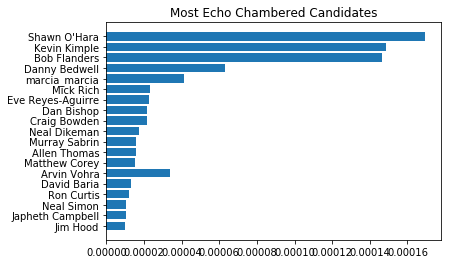

In [69]:
plt.barh(most_echod_candidate['Real Name'], most_echod_candidate.ratio_normalized)
plt.title('Most Echo Chambered Candidates')
plt.show()

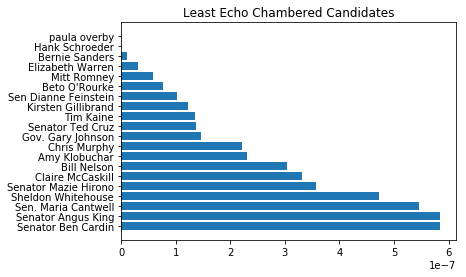

In [70]:
least_echod_candidate = candidate_echo.nsmallest(20, 'ratio_normalized').sort_values('ratio_normalized', ascending=False)

plt.barh(least_echod_candidate['Real Name'], least_echod_candidate.ratio_normalized)
plt.title('Least Echo Chambered Candidates')
plt.show()

In [71]:
candidate_echo[candidate_echo['Real Name'] == "Shawn O'Hara"]

,followers,f_of_f_candidate_followers,n_f_of_f,ratio,n_candidate_followers,ratio_normalized,opponent_followers,candidate_and_opponent_followers,only_candidate,only_opponent,...,Profile Created At,URL,Location,UTC Offset,Time Zone,Favourites Count,Friends Count,Followers Count,Statuses Count,Profile Image URL
35,2.069926e+16,11.555556,61361.765432,0.014571,86.0,0.000169,0.0,0.0,11.555556,0.0,...,Wed Jun 11 02:53:45 +0000 2014,None,H'burg whudup,None,None,2,560,86,134,http://pbs.twimg.com/profile_images/4765601471...


In [72]:
raw['only_candidate'] = raw.f_of_f_candidate_followers - raw.candidate_and_opponent_followers
raw['only_opponent'] = raw.opponent_followers - raw.candidate_and_opponent_followers

raw['ratio_only_candidate'] = raw.only_candidate / raw.n_f_of_f
raw['ratio_only_candidate_normalized'] = raw.ratio_only_candidate / raw.n_candidate_followers

raw['ratio_candidate_and_opponent'] = raw.candidate_and_opponent_followers / raw.n_f_of_f
raw['ratio_only_candidate_normalized'] = raw.ratio_candidate_and_opponent / raw.n_candidate_followers

raw['ratio_opponent_over_candidate_followers'] = raw.opponent_followers / raw.n_f_of_f

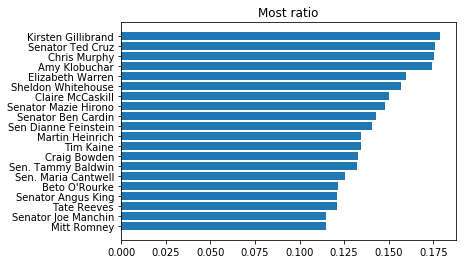

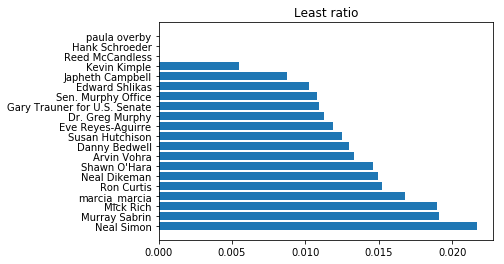

In [73]:
variable = 'ratio'
most_echod_candidate = candidate_echo.nlargest(20, variable).sort_values(variable, ascending=True)
plt.barh(most_echod_candidate['Real Name'], most_echod_candidate[variable])
plt.title('Most ' + variable)
plt.show()

least_echod_candidate = candidate_echo.nsmallest(20, variable).sort_values(variable, ascending=False)
plt.barh(least_echod_candidate['Real Name'], least_echod_candidate[variable])
plt.title('Least '+variable)
plt.show()

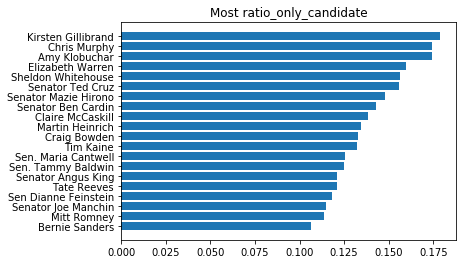

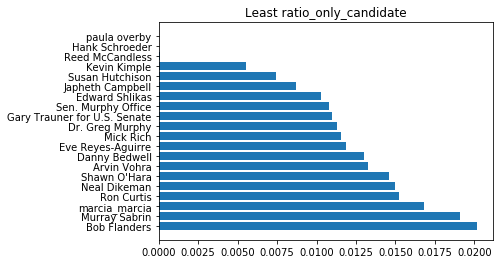

In [74]:
variable = 'ratio_only_candidate'
most_echod_candidate = candidate_echo.nlargest(20, variable).sort_values(variable, ascending=True)
plt.barh(most_echod_candidate['Real Name'], most_echod_candidate[variable])
plt.title('Most ' + variable)
plt.show()

least_echod_candidate = candidate_echo.nsmallest(20, variable).sort_values(variable, ascending=False)
plt.barh(least_echod_candidate['Real Name'], least_echod_candidate[variable])
plt.title('Least '+variable)
plt.show()

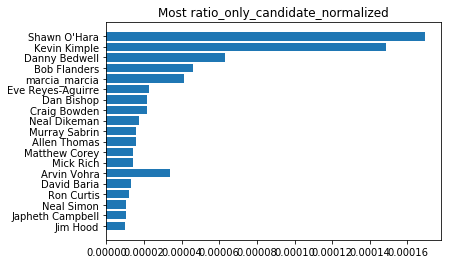

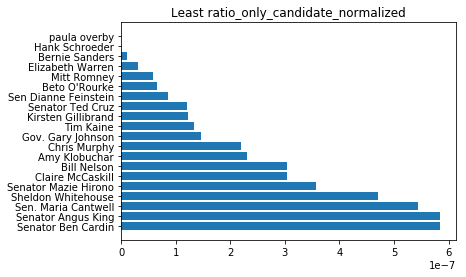

In [75]:
variable = 'ratio_only_candidate_normalized'
most_echod_candidate = candidate_echo.nlargest(20, variable).sort_values(variable, ascending=True)
plt.barh(most_echod_candidate['Real Name'], most_echod_candidate[variable])
plt.title('Most ' + variable)
plt.show()

least_echod_candidate = candidate_echo.nsmallest(20, variable).sort_values(variable, ascending=False)
plt.barh(least_echod_candidate['Real Name'], least_echod_candidate[variable])
plt.title('Least '+variable)
plt.show()

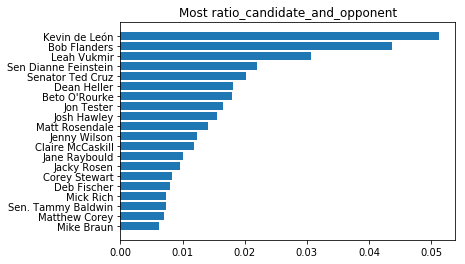

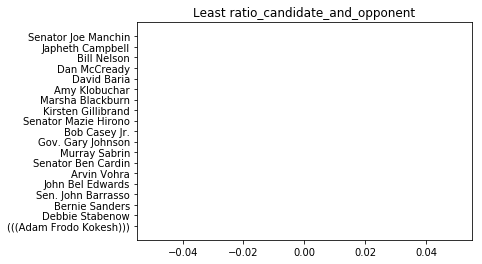

In [76]:
variable = 'ratio_candidate_and_opponent'
most_echod_candidate = candidate_echo.nlargest(20, variable).sort_values(variable, ascending=True)
plt.barh(most_echod_candidate['Real Name'], most_echod_candidate[variable])
plt.title('Most ' + variable)
plt.show()

least_echod_candidate = candidate_echo.nsmallest(20, variable).sort_values(variable, ascending=False)
plt.barh(least_echod_candidate['Real Name'], least_echod_candidate[variable])
plt.title('Least '+variable)
plt.show()

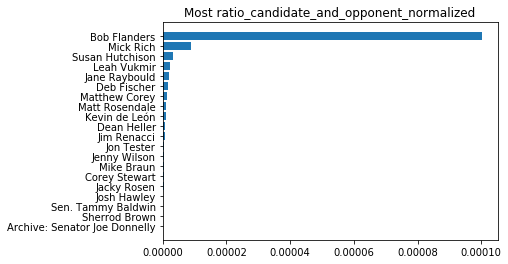

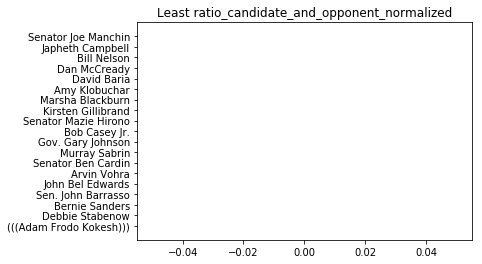

In [77]:
variable = 'ratio_candidate_and_opponent_normalized'
most_echod_candidate = candidate_echo.nlargest(20, variable).sort_values(variable, ascending=True)
plt.barh(most_echod_candidate['Real Name'], most_echod_candidate[variable])
plt.title('Most ' + variable)
plt.show()

least_echod_candidate = candidate_echo.nsmallest(20, variable).sort_values(variable, ascending=False)
plt.barh(least_echod_candidate['Real Name'], least_echod_candidate[variable])
plt.title('Least '+variable)
plt.show()

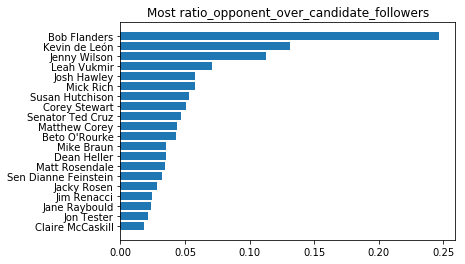

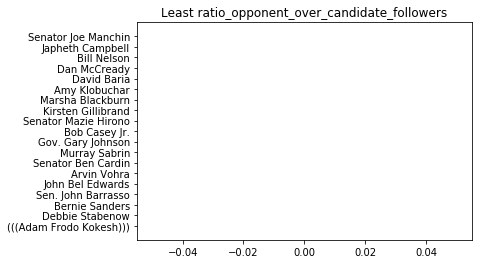

In [78]:
variable = 'ratio_opponent_over_candidate_followers'
most_echod_candidate = candidate_echo.nlargest(20, variable).sort_values(variable, ascending=True)
plt.barh(most_echod_candidate['Real Name'], most_echod_candidate[variable])
plt.title('Most ' + variable)
plt.show()

least_echod_candidate = candidate_echo.nsmallest(20, variable).sort_values(variable, ascending=False)
plt.barh(least_echod_candidate['Real Name'], least_echod_candidate[variable])
plt.title('Least '+variable)
plt.show()

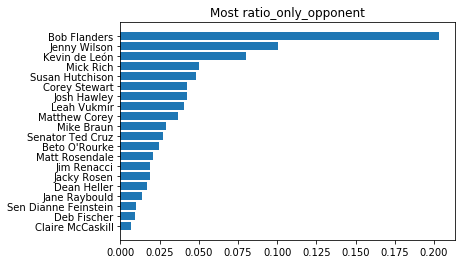

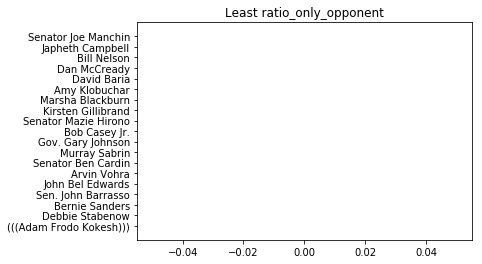

In [80]:
variable = 'ratio_only_opponent'
most_echod_candidate = candidate_echo.nlargest(20, variable).sort_values(variable, ascending=True)
plt.barh(most_echod_candidate['Real Name'], most_echod_candidate[variable])
plt.title('Most ' + variable)
plt.show()

least_echod_candidate = candidate_echo.nsmallest(20, variable).sort_values(variable, ascending=False)
plt.barh(least_echod_candidate['Real Name'], least_echod_candidate[variable])
plt.title('Least '+variable)
plt.show()

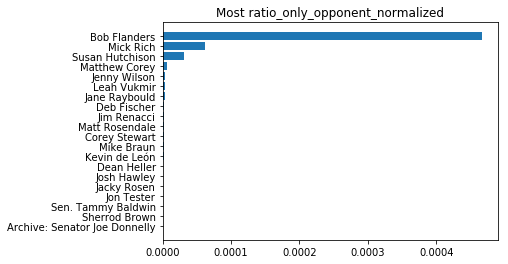

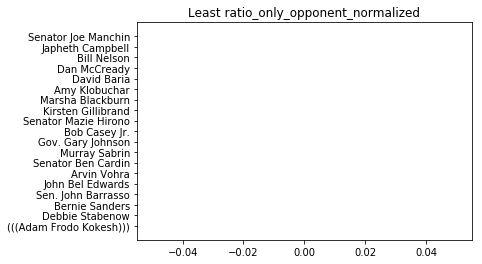

In [81]:
variable = 'ratio_only_opponent_normalized'
most_echod_candidate = candidate_echo.nlargest(20, variable).sort_values(variable, ascending=True)
plt.barh(most_echod_candidate['Real Name'], most_echod_candidate[variable])
plt.title('Most ' + variable)
plt.show()

least_echod_candidate = candidate_echo.nsmallest(20, variable).sort_values(variable, ascending=False)
plt.barh(least_echod_candidate['Real Name'], least_echod_candidate[variable])
plt.title('Least '+variable)
plt.show()

# Distribution of Echo Chamberedness for Candidates and Followers 

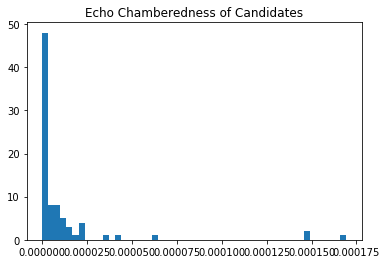

In [54]:
plt.hist(candidate_echo.ratio_normalized, bins=50)
plt.title('Echo Chamberedness of Candidates')
plt.show()

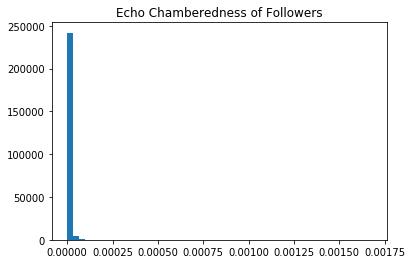

In [55]:
plt.hist(df.ratio_normalized, bins=50)
plt.title('Echo Chamberedness of Followers')
plt.show()

# How many followers do candidates have?

(array([75.,  5.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([2.0000000e+00, 9.6317610e+05, 1.9263502e+06, 2.8895243e+06,
        3.8526984e+06, 4.8158725e+06, 5.7790466e+06, 6.7422207e+06,
        7.7053948e+06, 8.6685689e+06, 9.6317430e+06]),
 <a list of 10 Patch objects>)

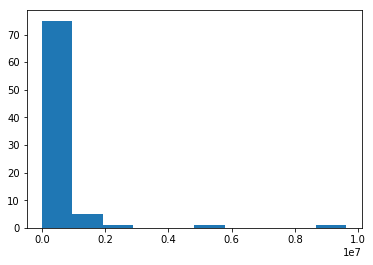

In [56]:
plt.hist(candidate_echo.n_candidate_followers)

# How does number of followers correlate with echo chamberedness?

In [ ]:
#remove small candidates and recompute graphs

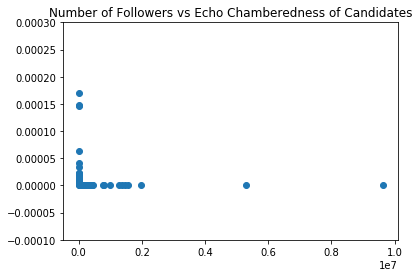

In [57]:
plt.scatter(candidate_echo.n_candidate_followers, candidate_echo.ratio_normalized)
plt.title('Number of Followers vs Echo Chamberedness of Candidates')
plt.ylim(-0.0001, 0.0003)
plt.show()

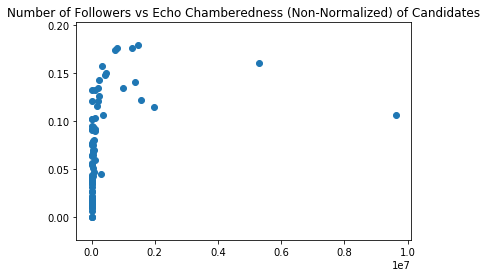

In [58]:
plt.scatter(candidate_echo.n_candidate_followers, candidate_echo.ratio)
plt.title('Number of Followers vs Echo Chamberedness (Non-Normalized) of Candidates')
plt.show()

# Do candidates appear twice in dataset?

In [59]:
candidate_echo[candidate_echo['Real Name'].duplicated()]

,followers,f_of_f_candidate_followers,n_f_of_f,ratio,n_candidate_followers,ratio_normalized,opponent_followers,candidate_and_opponent_followers,only_candidate,only_opponent,...,Profile Created At,URL,Location,UTC Offset,Time Zone,Favourites Count,Friends Count,Followers Count,Statuses Count,Profile Image URL
22,1.110616e+17,14.760844,8330.94959,0.013286,983.0,0.000014,14.760844,14.760844,0.0,0.0,...,Thu Apr 29 20:13:25 +0000 2010,http://t.co/nDS7siDrPo,"Bethesda, MD",None,None,2,1794,983,1771,http://pbs.twimg.com/profile_images/860753740/...


# POLLS

In [60]:
#polls = pd.read_csv('../poll_variance/poll_variances_2018.csv')

In [90]:
from fuzzywuzzy import fuzz

def match_name(name, list_names, min_score=0):
    # -1 score incase we don't get any matches
    max_score = -1
    # Returning empty name for no match as well
    max_name = ""
    # Iternating over all names in the other
    for name2 in list_names:
        #Finding fuzzy match score
        score = fuzz.ratio(name, name2)
        # Checking if we are above our threshold and have a better score
        if (score > min_score) & (score > max_score):
            max_name = name2
            max_score = score
    return (max_name, max_score)

In [91]:
# List for dicts for easy dataframe creation
dict_list = []
# iterating over our players without salaries found above
for name in candidate_echo['Real Name']:
    # Use our method to find best match, we can set a threshold here
    match = match_name(name, polls.candidate_name)
    
    # New dict for storing data
    dict_ = {}
    dict_.update({"twitter_name" : name})
    dict_.update({"poll_name" : match[0]})
    dict_.update({"score" : match[1]})
    dict_list.append(dict_)
    
merge_table = pd.DataFrame(dict_list)
# Display results


NameError: name 'polls' is not defined

In [64]:
polls = pd.merge(polls, merge_table, left_on='candidate_name', right_on='poll_name')
polls.to_csv('polls_twitter_names.csv', index=False)

NameError: name 'polls' is not defined

In [92]:
polls_new = pd.read_csv('polls_twitter_names_clean.csv')

In [93]:
poll_analysis = pd.merge(candidate_echo, polls_new, left_on='Real Name', right_on='twitter_name')

In [ ]:
#show correlation NUMBER!

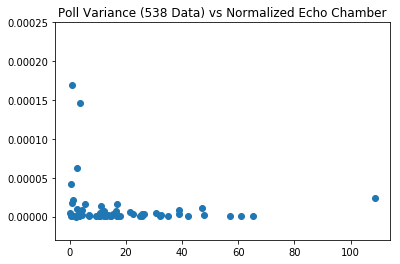

In [94]:
plt.scatter(poll_analysis.poll_variance, poll_analysis.ratio_normalized)
plt.title('Poll Variance (538 Data) vs Normalized Echo Chamber')
plt.ylim(-0.00003,0.00025)
plt.show()

In [ ]:
# run correlation

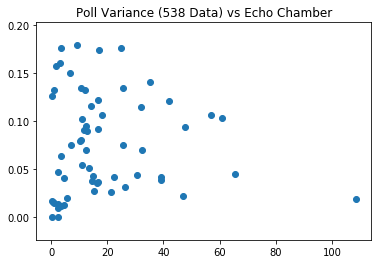

In [95]:
plt.scatter(poll_analysis.poll_variance, poll_analysis.ratio)
plt.title('Poll Variance (538 Data) vs Echo Chamber')
plt.show()

Maybe I made a mistake, but it seems like they aren't related :(

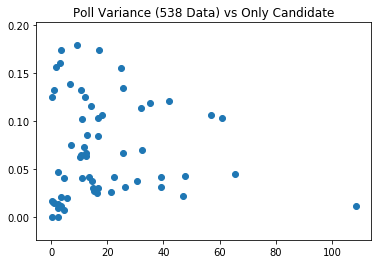

In [96]:
plt.scatter(poll_analysis.poll_variance, poll_analysis.ratio_only_candidate)
plt.title('Poll Variance (538 Data) vs Only Candidate')
plt.show()

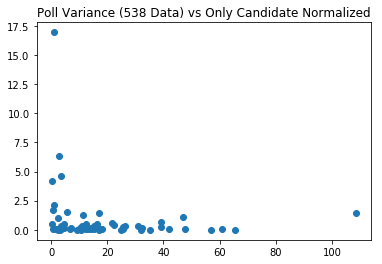

In [102]:
plt.scatter(poll_analysis.poll_variance, poll_analysis.ratio_only_candidate_normalized*100000)
plt.title('Poll Variance (538 Data) vs Only Candidate Normalized')
plt.show()

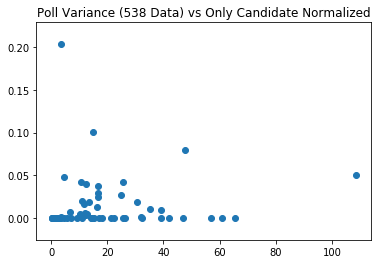

In [103]:
plt.scatter(poll_analysis.poll_variance, poll_analysis.ratio_only_opponent)
plt.title('Poll Variance (538 Data) vs Only Opponent')
plt.show()

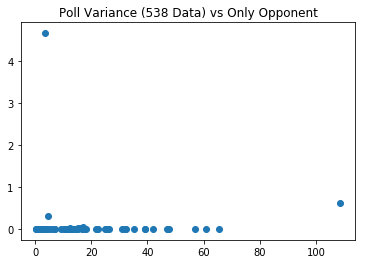

In [105]:
plt.scatter(poll_analysis.poll_variance, poll_analysis.ratio_only_opponent_normalized*10000)
plt.title('Poll Variance (538 Data) vs Only Opponent')
plt.show()

# VOTER TURNOUT 

figure out the state for each twitter account

In [106]:
election_results = pd.read_csv('election_results.csv')

In [107]:
dem_candidates = election_results.candidate_18_dem.dropna()
rep_candidates = election_results.candidate_18_rep.dropna()

In [108]:
#match democrats, then republicans
# List for dicts for easy dataframe creation
dict_list = []
# iterating over our players without salaries found above
#for name in rep_candidates:
for name in dem_candidates:
    # Use our method to find best match, we can set a threshold here
    match = match_name(name, candidate_echo['Real Name'])

    # New dict for storing data
    dict_ = {}
    dict_.update({"twitter_name" : name})
    dict_.update({"dem_name" : match[0]})
    dict_.update({"score" : match[1]})
    dict_list.append(dict_)


merge_table = pd.DataFrame(dict_list)
# Display results
#merge_table.to_csv('rep_candidates_fuzzy.csv', index=False)
merge_table.to_csv('dem_candidates_fuzzy1.csv', index=False)


In [109]:
rep_candidates_fuzzy = pd.read_csv('rep_candidates_fuzzy.csv')
rep_candidates_fuzzy.columns = ['rep_twitter_name', 'score', 'rep_name']
dem_candidates_fuzzy = pd.read_csv('dem_candidates_fuzzy.csv')
dem_candidates_fuzzy.columns = ['dem_twitter_name', 'score', 'dem_name']

In [110]:
election_results = pd.merge(election_results, rep_candidates_fuzzy, left_on='candidate_18_rep', right_on='rep_name')
election_results = pd.merge(election_results, dem_candidates_fuzzy, left_on='candidate_18_dem', right_on='dem_name')

In [111]:
state_candidate_twitter = election_results[['state', 'dem_twitter_name', 'rep_twitter_name']]
state_candidate_twitter = pd.melt(state_candidate_twitter, id_vars='state', value_vars=['dem_twitter_name', 'rep_twitter_name'] )


In [112]:
candidate_echo_vt = pd.merge(candidate_echo, state_candidate_twitter, left_on='Real Name', right_on='value')

now use voter turnout data 

In [23]:
voter_turnout = pd.read_csv('voter_turnout.csv')[['State', 'Estimated or Actual 2018 Total Ballots Counted VEP Turnout Rate']]
voter_turnout.columns = ['state','voter_turnout']


In [114]:
voter_turnout['voter_turnout'] = voter_turnout.voter_turnout.apply(lambda x: float(x.strip('%')))

In [115]:
candidate_echo_vt = pd.merge(candidate_echo_vt, voter_turnout, on='state')

In [132]:
vt_analysis = candidate_echo_vt.groupby('state').agg({'voter_turnout': 'mean', 
                                                      'ratio_normalized': ['mean', 'min', 'max'], 
                                                      'ratio': ['mean', 'min', 'max'],
                                                      'ratio_only_candidate': ['mean', 'min', 'max'],
                                                      'ratio_only_candidate_normalized': ['mean', 'min', 'max'],
                                                      'ratio_opponent_over_candidate_followers':['mean', 'min', 'max']})

In [133]:
vt_analysis.columns = ['%s%s' % (a, '_%s' % b if b else '') for a, b in vt_analysis.columns]

In [134]:
vt_analysis.head()

,voter_turnout_mean,ratio_normalized_mean,ratio_normalized_min,ratio_normalized_max,ratio_mean,ratio_min,ratio_max,ratio_only_candidate_mean,ratio_only_candidate_min,ratio_only_candidate_max,ratio_only_candidate_normalized_mean,ratio_only_candidate_normalized_min,ratio_only_candidate_normalized_max,ratio_opponent_over_candidate_followers_mean,ratio_opponent_over_candidate_followers_min,ratio_opponent_over_candidate_followers_max
state,,,,,,,,,,,,,,,,
California,49.6,8.879648e-07,1.027903e-07,1.673139e-06,0.117047,0.093651,0.140443,0.080390,0.042325,0.118455,4.214293e-07,8.669751e-08,7.561611e-07,0.081618,0.032124,0.131112
Connecticut,54.4,7.862120e-06,2.216335e-07,1.550261e-05,0.133569,0.091620,0.175518,0.129339,0.084568,0.174110,7.264576e-06,2.198561e-07,1.430930e-05,0.023189,0.002351,0.044028
Delaware,51.4,1.072510e-06,1.072510e-06,1.072510e-06,0.103462,0.103462,0.103462,0.103462,0.103462,0.103462,1.072510e-06,1.072510e-06,1.072510e-06,0.000000,0.000000,0.000000
Florida,54.9,3.047101e-07,3.047101e-07,3.047101e-07,0.105760,0.105760,0.105760,0.105760,0.105760,0.105760,3.047101e-07,3.047101e-07,3.047101e-07,0.000000,0.000000,0.000000
Hawaii,39.3,6.080964e-06,3.568869e-07,1.180504e-05,0.081650,0.015217,0.148083,0.081650,0.015217,0.148083,6.080964e-06,3.568869e-07,1.180504e-05,0.000000,0.000000,0.000000


In [ ]:
#and abs(difference)!

In [ ]:
#EVENTUALLY RUN REGRESSION CONTROLLING ON SIZE number of followers of candidate (etc.) 

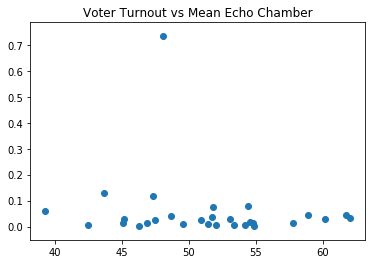

In [137]:
plt.scatter(vt_analysis.voter_turnout_mean,vt_analysis.ratio_normalized_mean*10000)
plt.title('Voter Turnout vs Mean Echo Chamber')
plt.show()

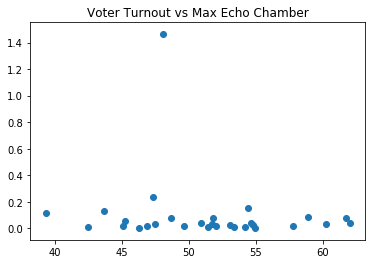

In [139]:
plt.scatter(vt_analysis.voter_turnout_mean,vt_analysis.ratio_normalized_max*10000)
plt.title('Voter Turnout vs Max Echo Chamber')
plt.show()

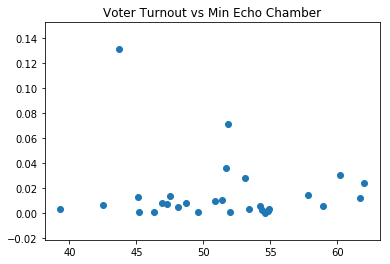

In [140]:
plt.scatter(vt_analysis.voter_turnout_mean,vt_analysis.ratio_normalized_min*10000)
plt.title('Voter Turnout vs Min Echo Chamber')
plt.show()

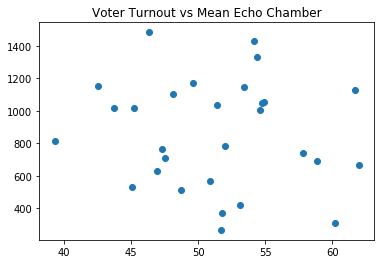

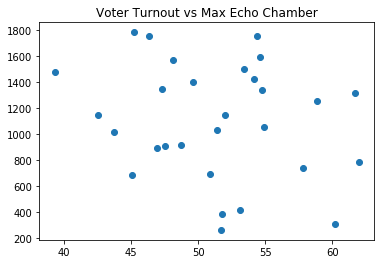

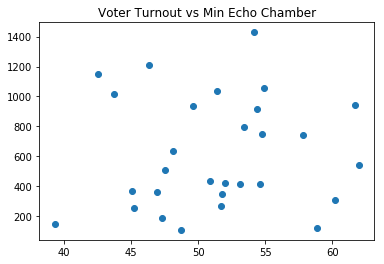

In [141]:
plt.scatter(vt_analysis.voter_turnout_mean,vt_analysis.ratio_mean*10000)
plt.title('Voter Turnout vs Mean Echo Chamber')
plt.show()

plt.scatter(vt_analysis.voter_turnout_mean,vt_analysis.ratio_max*10000)
plt.title('Voter Turnout vs Max Echo Chamber')
plt.show()

plt.scatter(vt_analysis.voter_turnout_mean,vt_analysis.ratio_min*10000)
plt.title('Voter Turnout vs Min Echo Chamber')
plt.show()

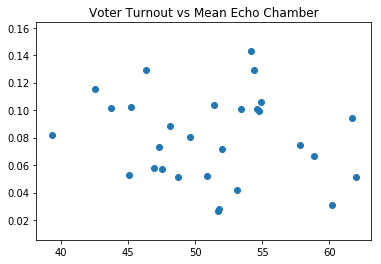

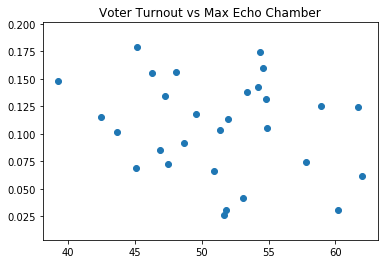

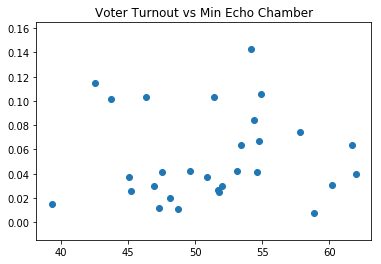

In [145]:
plt.scatter(vt_analysis.voter_turnout_mean,vt_analysis.ratio_only_candidate_mean)
plt.title('Voter Turnout vs Mean Echo Chamber')
plt.show()

plt.scatter(vt_analysis.voter_turnout_mean,vt_analysis.ratio_only_candidate_max)
plt.title('Voter Turnout vs Max Echo Chamber')
plt.show()

plt.scatter(vt_analysis.voter_turnout_mean,vt_analysis.ratio_only_candidate_min)
plt.title('Voter Turnout vs Min Echo Chamber')
plt.show()

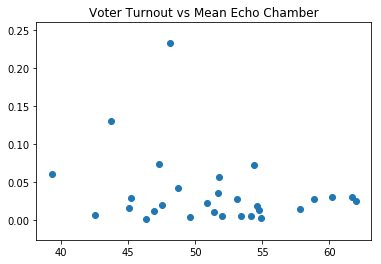

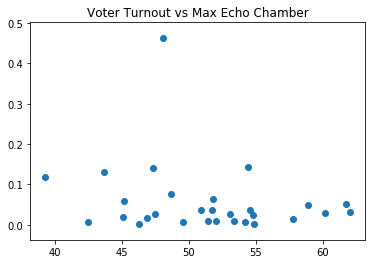

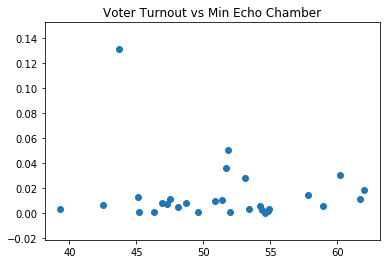

In [149]:
plt.scatter(vt_analysis.voter_turnout_mean,vt_analysis.ratio_only_candidate_normalized_mean*10000)
plt.title('Voter Turnout vs Mean Echo Chamber')
plt.show()

plt.scatter(vt_analysis.voter_turnout_mean,vt_analysis.ratio_only_candidate_normalized_max*10000)
plt.title('Voter Turnout vs Max Echo Chamber')
plt.show()

plt.scatter(vt_analysis.voter_turnout_mean,vt_analysis.ratio_only_candidate_normalized_min*10000)
plt.title('Voter Turnout vs Min Echo Chamber')
plt.show()

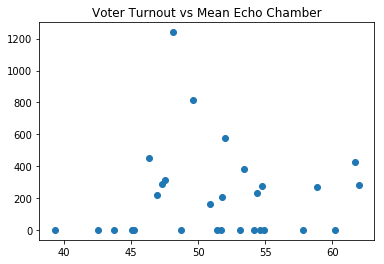

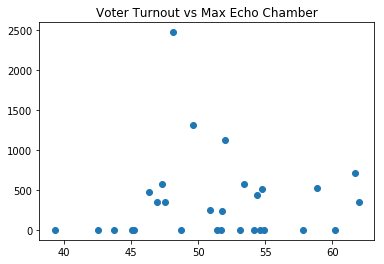

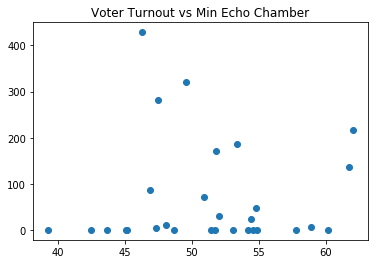

In [150]:
plt.scatter(vt_analysis.voter_turnout_mean,vt_analysis.ratio_opponent_over_candidate_followers_mean*10000)
plt.title('Voter Turnout vs Mean Echo Chamber')
plt.show()

plt.scatter(vt_analysis.voter_turnout_mean,vt_analysis.ratio_opponent_over_candidate_followers_max*10000)
plt.title('Voter Turnout vs Max Echo Chamber')
plt.show()

plt.scatter(vt_analysis.voter_turnout_mean,vt_analysis.ratio_opponent_over_candidate_followers_min*10000)
plt.title('Voter Turnout vs Min Echo Chamber')
plt.show()

# ELECTION OUTCOME 

In [85]:
election_results['dem_winner18'] = (election_results.pct_votes_18_dem > election_results.pct_votes_18_rep)*1

In [86]:
candidate_echo_simplified = candidate_echo[['Real Name', 'ratio_normalized']]

In [87]:
election_results = pd.merge(election_results, candidate_echo_simplified, 
                            left_on='dem_twitter_name', right_on='Real Name', 
                            how='left')

In [88]:
tmp = list(election_results.columns)[:-1]
tmp.append('echo_dem')
election_results.columns = tmp

In [89]:
election_results = pd.merge(election_results, candidate_echo_simplified, 
                            left_on='rep_twitter_name', right_on='Real Name', 
                            how='left')

In [90]:
tmp = list(election_results.columns)[:-1]
tmp.append('echo_rep')
election_results.columns = tmp

In [91]:
election_results['dem_more_echoed'] = (election_results.echo_dem > election_results.echo_rep)*1

In [92]:
np.correlate(election_results.dem_winner18, election_results.dem_more_echoed)

array([0])

In [93]:
election_results[['dem_winner18', 'dem_more_echoed']].corr()

,dem_winner18,dem_more_echoed
dem_winner18,1.000000,-0.377964
dem_more_echoed,-0.377964,1.000000


In [ ]:
#RUN IN REGRESSION CONTROLLING FOR SIZE

In [94]:
election_results[['pct_votes_18_dem', 'pct_votes_18_rep', 'echo_dem', 'echo_rep']].corr()

,pct_votes_18_dem,pct_votes_18_rep,echo_dem,echo_rep
pct_votes_18_dem,1.000000,-0.378212,-0.734315,0.272032
pct_votes_18_rep,-0.378212,1.000000,0.133676,-0.245412
echo_dem,-0.734315,0.133676,1.000000,-0.114771
echo_rep,0.272032,-0.245412,-0.114771,1.000000


# Compile List of Candidates and Opponents 

In [95]:
candidates_opponents = election_results[['rep_twitter_name', 'dem_twitter_name']]
candidates_opponents.head()

,rep_twitter_name,dem_twitter_name
0,NaN,NaN
1,Kevin de Leόn,Sen Dianne Feinstein
2,Matthew Corey,Chris Murphy
3,NaN,Senator Tom Carper
4,NaN,Bill Nelson


In [96]:
candidate_opponents_id = list()
for i in candidates_opponents.index:
    r = candidates_opponents.iloc[i,0]
    d = candidates_opponents.iloc[i,1]
    
    try:
        r_id =candidate_echo[candidate_echo['Real Name'] == r].UserID.tolist()[0]
    except:
        r_id = None
        
    try:
        d_id =candidate_echo[candidate_echo['Real Name'] == d].UserID.tolist()[0]
    except:
        d_id = None
    
    candidate_opponents_id.append((r_id, d_id))

In [97]:
candidate_opponents_id_df = pd.DataFrame(candidate_opponents_id, columns=['republican_id', 'democrat_id'])

In [98]:
candidate_opponents_id_df.head()

,republican_id,democrat_id
0,NaN,NaN
1,3.081594e+07,476256944.0
2,2.497704e+09,150078976.0
3,NaN,249787913.0
4,NaN,20597460.0


In [99]:
candidate_opponents_id_df.to_csv('opponents.csv', index=False)

In [100]:
candidate_opponents_id_df = pd.read_csv('opponents.csv')
candidate_opponents_id_df.head()

,republican_id,democrat_id
0,NaN,NaN
1,3.081594e+07,476256944.0
2,2.497704e+09,150078976.0
3,NaN,249787913.0
4,NaN,20597460.0


# Data Quality 

how many candidates are missing?

In [101]:
rep_candidates_fuzzy[rep_candidates_fuzzy.rep_twitter_name.isna()]

,rep_twitter_name,score,rep_name
0,NaN,53,Martha McSally
3,NaN,41,Robert B Arlett
4,NaN,53,Rick Scott
8,NaN,62,Tony Campbell
10,NaN,60,John James
11,NaN,43,Jim Newberger
12,NaN,38,Roger F. Wicker
17,NaN,48,Bob Hugin
20,NaN,67,Kevin Cramer
22,NaN,43,Louis J. Barletta


In [102]:
rep_candidates_fuzzy.rep_twitter_name.isna().sum()

12

In [103]:
dem_candidates_fuzzy[dem_candidates_fuzzy.dem_twitter_name.isna()]

,dem_twitter_name,score,dem_name
0,NaN,56,Kyrsten Sinema
7,NaN,51,Zak Ringelstein


which twitter accounts seem off?

In [104]:
candidate_echo.sort_values('Followers Count').head(10)

,followers,f_of_f_candidate_followers,n_f_of_f,ratio,n_candidate_followers,ratio_normalized,opponent_followers,candidate_and_opponent_followers,only_candidate,only_opponent,...,Profile Created At,URL,Location,UTC Offset,Time Zone,Favourites Count,Friends Count,Followers Count,Statuses Count,Profile Image URL
32,6.393368e+08,0.000000,10514.500000,0.000000,2.0,0.000000,0.000000,0.000000,0.0,0.0,...,Sun Jun 02 14:42:30 +0000 2013,None,,None,None,0,0,2,0,http://abs.twimg.com/sticky/default_profile_im...
74,5.127620e+17,0.400000,16224.600000,0.000061,12.0,0.000005,0.400000,0.400000,0.0,0.0,...,Fri Mar 02 19:00:33 +0000 2018,None,,None,None,2,41,12,13,http://pbs.twimg.com/profile_images/9722347569...
54,3.327443e+17,0.000000,6497.823529,0.000000,24.0,0.000000,0.000000,0.000000,0.0,0.0,...,Sun Jan 11 00:44:11 +0000 2015,https://t.co/8qjPiv2NPG,"Seagirt, NJ",None,None,2,17,24,96,http://pbs.twimg.com/profile_images/7239159756...
51,5.072906e+17,3.407407,1740.925926,0.005505,37.0,0.000149,3.407407,3.407407,0.0,0.0,...,Fri Jun 09 17:00:10 +0000 2017,None,New Jersey,None,None,91,56,37,211,http://pbs.twimg.com/profile_images/9584283490...
35,2.069926e+16,11.555556,61361.765432,0.014571,86.0,0.000169,11.555556,11.555556,0.0,0.0,...,Wed Jun 11 02:53:45 +0000 2014,None,H'burg whudup,None,None,2,560,86,134,http://pbs.twimg.com/profile_images/4765601471...
34,2.639202e+17,11.738095,4094.565476,0.012997,206.0,0.000063,11.738095,11.738095,0.0,0.0,...,Sat Aug 06 17:19:42 +0000 2016,https://t.co/tULcJOQDWF,,None,None,2855,200,206,1331,http://pbs.twimg.com/profile_images/1004765350...
28,1.963508e+17,37.492537,5265.489552,0.016774,404.0,0.000042,37.492537,37.492537,0.0,0.0,...,Wed Oct 01 16:43:07 +0000 2014,https://t.co/MGWQ6FKhNJ,"St Clair Shores, MI",None,None,831,58,405,484,http://pbs.twimg.com/profile_images/7663767444...
65,1.025802e+17,39.810026,5241.601583,0.063831,436.0,0.000146,39.810026,39.810026,0.0,0.0,...,Tue Aug 26 14:27:37 +0000 2014,https://t.co/VgOSJF9YUu,"Providence, RI",None,None,18,385,437,78,http://pbs.twimg.com/profile_images/9548651169...
0,2.983732e+17,11.769417,15142.101942,0.011844,517.0,0.000023,11.769417,11.769417,0.0,0.0,...,Mon Aug 21 18:20:53 +0000 2017,https://t.co/LUSeUll12Z,"Phoenix, AZ",None,None,139,153,517,255,http://pbs.twimg.com/profile_images/9526583387...
57,3.175242e+17,23.600316,8010.620853,0.018951,816.0,0.000023,23.600316,23.600316,0.0,0.0,...,Tue Jan 19 19:29:41 +0000 2016,https://t.co/Z3g49Hkdjp,"Albuquerque, NM",None,None,6,158,815,547,http://pbs.twimg.com/profile_images/1034834484...


In [105]:
#Paula overby: 
    #the account that we're tracking seems off: https://twitter.com/paulaoverby
    #this account seems better: https://twitter.com/PaulaOverby2014

#Reed McCandless only got 1.2% of the vote. Not sure if he's relevant for the analysis

#Kevin Kimple:
    #he got 0.29% of the votes. 
    #perhaps we should track bob hugin instead, who got 42.8%

#Bob Flanders
    #this is the account we're tracking: https://twitter.com/rgflandersjr
    #this account seems better: https://twitter.com/flanders4senate
    
#Maybe i should eliminate independents with almost no votes from analysis 
#Go through other acccounts to make sure there isn't an official campaign one for the person

Todo: 
Only look at major candidates
    - only look at mid 50% PERCENTILE?
    - also only remove bottom 25% # followers
Compute correlation number  
Compute regression controlling by size 